In [1]:
%run C:/Users/HSS/dd.py

### 보스턴 Data


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [19]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [23]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])

In [26]:
dfx.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [27]:
dfy.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


#### - 독립변수와 종속변수 병합


In [34]:
df = pd.concat([dfx,dfy], axis = 1)
df.tail()

TypeError: concat() got an unexpected keyword argument 'annot'

### - 변수간 관계
- TAX, MEDV 관계는 좀 이해가 안되는데?


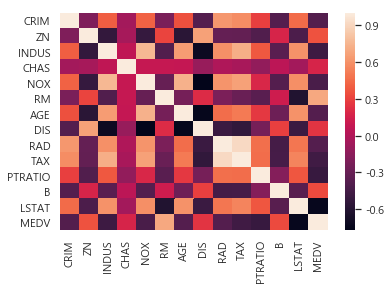

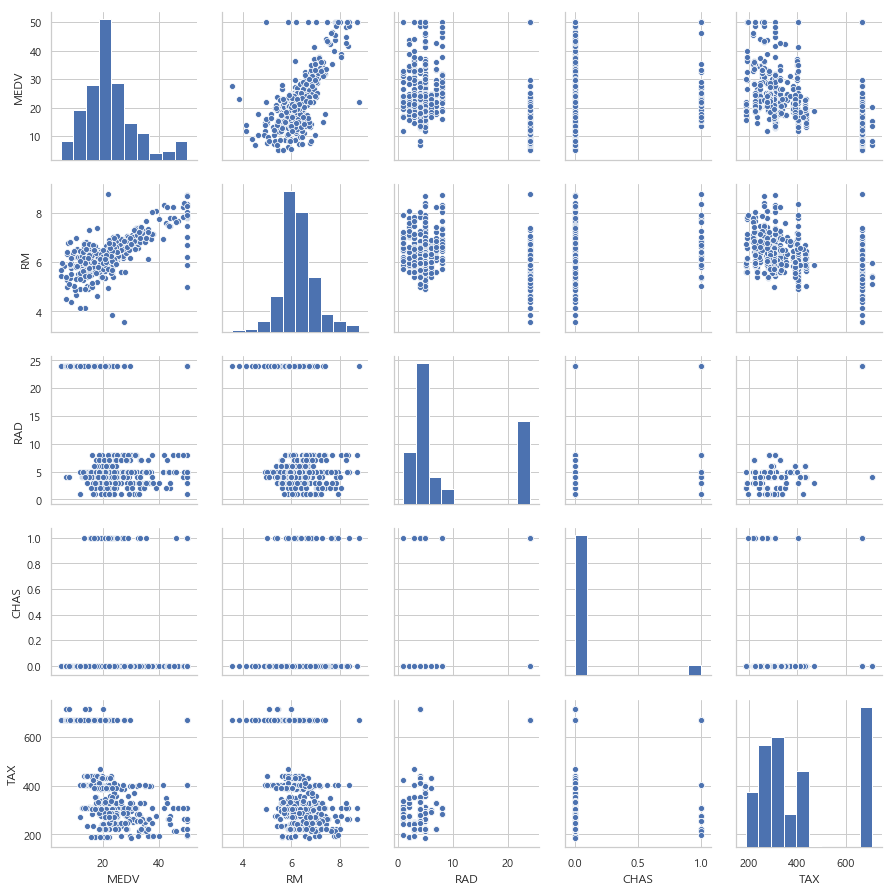

In [39]:
sns.heatmap(df.corr(), cbar = True)
sns.pairplot(df[["MEDV", "RM", "RAD", "CHAS","TAX"]])
plt.show()

### 파이썬 회귀분석 3가지 방법
- numpy
- scikit-learn
- stats.model

In [65]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(n_samples = 200, n_features = 1, bias = bias, noise = 10, coef = True, random_state = 1)
X = sm.add_constant(X0)

In [67]:
w*X0+bias

array([[ 120.0986764 ],
       [  96.65485282],
       [ 147.59283407],
       [ 143.49929207],
       [ 289.05989188],
       [  93.67955715],
       [  76.84162656],
       [ -40.68869691],
       [ 145.84813916],
       [ 114.64276292],
       [  44.075383  ],
       [ 144.34172788],
       [ 175.11342098],
       [ 175.74300096],
       [  91.20427861],
       [ 270.05189991],
       [ 206.86383765],
       [ 168.53652276],
       [  98.90517147],
       [   5.34712316],
       [ 190.28987068],
       [ 124.68843682],
       [ 151.31364235],
       [ 250.83538795],
       [ -18.70316784],
       [  24.11094552],
       [ 177.87714376],
       [  90.45208176],
       [  93.46698086],
       [ 200.30888257],
       [  -6.33599561],
       [ 164.01958188],
       [  74.35598257],
       [ -60.61871032],
       [ 118.45956653],
       [ -74.81513545],
       [ 132.63961268],
       [ 170.10510399],
       [ 205.85617227],
       [  80.7801894 ],
       [ 289.38148531],
       [  41.972

In [62]:
y.reshape(len(y),-1)

array([[ 127.87901739],
       [  93.03291422],
       [ 161.8575084 ],
       [ 141.69205026],
       [ 283.26011945],
       [  90.25696513],
       [  56.03995466],
       [ -42.34640353],
       [ 141.31386351],
       [ 124.09193693],
       [  39.41917167],
       [ 135.07481793],
       [ 178.08066288],
       [ 180.36872137],
       [  89.19700235],
       [ 277.68618624],
       [ 202.52143015],
       [ 165.39865332],
       [ 106.38565624],
       [  -1.06621849],
       [ 185.12242638],
       [ 112.67820029],
       [ 151.75241542],
       [ 260.90931323],
       [ -17.9616411 ],
       [  31.01126238],
       [ 179.2938956 ],
       [  83.19417584],
       [ 100.66930574],
       [ 206.12479851],
       [ -12.22124607],
       [ 164.77212573],
       [  54.65764624],
       [ -51.08607086],
       [ 121.03299419],
       [ -65.9912507 ],
       [ 123.47026771],
       [ 205.83869473],
       [ 205.19728016],
       [  95.38016322],
       [ 291.19019753],
       [  45.730

In [53]:
## numpy로 정답 추정하기 : 의사역행렬 사용
## y = xw

array([ 127.87901739,   93.03291422,  161.8575084 ,  141.69205026,
        283.26011945,   90.25696513,   56.03995466,  -42.34640353,
        141.31386351,  124.09193693,   39.41917167,  135.07481793,
        178.08066288,  180.36872137,   89.19700235,  277.68618624,
        202.52143015,  165.39865332,  106.38565624,   -1.06621849,
        185.12242638,  112.67820029,  151.75241542,  260.90931323,
        -17.9616411 ,   31.01126238,  179.2938956 ,   83.19417584,
        100.66930574,  206.12479851,  -12.22124607,  164.77212573,
         54.65764624,  -51.08607086,  121.03299419,  -65.9912507 ,
        123.47026771,  205.83869473,  205.19728016,   95.38016322,
        291.19019753,   45.7309971 ,  124.78046825,   -1.74260654,
        -26.18459865,  134.53858888,  252.09968374,  109.61418894,
        232.3968079 ,  128.08147968,  159.05974492,   65.07874616,
         38.39346876,   31.49882354,   32.77358586,  181.15848795,
        138.26384731,  160.01026797,   26.20090161,   95.94347

### 2. sklearn.linear_model (LinearRegression)

- `LinearRegression()`
- `model.fit(X,y)`
- `coef_`: 가중치벡터, `intercept_`: 상수항

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X0,y)

In [79]:
model.coef_, model.intercept_

(array([86.96171201]), 99.79150868986945)

### 3. statsmodels
- 독립변수와 종속변수가 모두 담긴 (concat) DF를 만든다.
- OLS클래스의 객체를 생성한다.
- `model = OSL.from_formula(formula, data = df)`
- `model = statsmodels.api.OLS(dfy,dfx)`도 쓸 수 있다. dfx는 항상 상수항을 가지고 있어야 한다.

- `result = model.fit()`, `result.summary()`로 리포트 생성 `result.predict(x_)`로 예측

In [82]:
sm.OLS(dfx,dfy)

In [111]:
df = pd.DataFrame({
    'x': X0[:,0],
    'y': y[:]
})

In [113]:
df.head(3)

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508


In [115]:
model = sm.OLS.from_formula('y~x', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        11:37:50   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.000      98.402     101.181
x             86.9617      0.769    113.058      0.000      85.445      88.479
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.059
Skew:                           0.121   Prob(JB):                        0.589
Kurtosis:                       3.262   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        12:07:22   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [117]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

In [120]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
df = pd.concat([dfx,dfy], axis = 1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [121]:
dfx = sm.add_constant(dfx)
model = sm.OLS(dfy,dfx)
result = model.fit()


#### Result 해석하기

- OLS, Least Square, 종속변수: `MEDV`
- `Df Model`: 독립변수 개수
- `Df Residuals`: `No.Observations` - `Df Model`
- warning.2 에 집중. 조건수가 크기 때문에 다중공선성 혹은 다른 수치적 무네가 있을 수 있다.

In [124]:
print(result.summary(), result.params)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          6.95e-135
Time:                        12:11:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [135]:
# sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names), data = boston)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

### 조건수?

- 공분산 행렬의 가장 큰 고유값과 가장 작은 고유값의 비율
- 조건수가 커지면 입력의 오차에 계수가 아주 민감하게 반응한다.(오차가 커진다, 예측 불가)
    - 그렇다면 조건수는 왜 커질까?
        - 1. 스케일링이 안되었을 때: 스케일링을 한다 ^^
        - 2. 다중공선성이 존재할 때: 변수를 선택하거나, PCA를 통해 하나의 축에서 만들어진 DATA를 사용한다.

In [143]:
# 보스턴 문제의 경우, TAX와 B의 분산이 다른 칼럼을 크게 웃도는 것을 발견할 수 있다. 
dfx.describe().T['std']

CRIM         8.596783
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [156]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = ['scale({})'.format(name) for name in feature_names] + ['CHAS']
feature_names

['scale(CRIM)',
 'scale(ZN)',
 'scale(INDUS)',
 'scale(NOX)',
 'scale(RM)',
 'scale(AGE)',
 'scale(DIS)',
 'scale(RAD)',
 'scale(TAX)',
 'scale(PTRATIO)',
 'scale(B)',
 'scale(LSTAT)',
 'CHAS']

In [162]:
model = sm.OLS.from_formula('MEDV ~' + '+'.join(feature_names), data = df)
result = model.fit()

In [164]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          6.95e-135
Time:                        13:19:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3468      0.219    101.

In [166]:
np.random.choice(100,100,replace = True)

array([83, 76, 47, 74, 12, 73, 63, 71, 80, 88, 30, 23, 59, 10, 43, 30,  6,
       35, 26, 63, 71, 43, 86, 87, 45, 17, 75, 30, 87, 80, 86,  1, 60, 87,
       25, 24, 98, 86, 55, 69, 89, 60,  6, 91, 78, 21, 36, 14, 41,  3, 53,
       77, 54, 36, 97, 34, 16, 77, 64,  9,  8, 48, 40, 16, 66,  2, 34, 88,
       13, 33, 63, 12, 17,  8, 76, 85, 28, 31, 60, 45, 71, 68,  0,  9, 73,
       95, 96, 25, 19,  1, 77, 95, 61, 72,  9, 36,  2, 73, 18,  0])